# Coursework 1 - Decision Trees Learning

### Enter your candidate number here:

In this coursework you will explore the classification and regression capabilities of one of the most used machine learning techniques, namely **Decision Trees**. 

Decision tree learning is one of the most widely used and practical methods for inductive inference. Moreover, decision trees are extremely useful in a sense that the acquired knowledge can be easily interpreted by a human being, allowing for us to understand and perhaps learn from it.

## Decision trees
Decision trees are a high-level representation of a sequence of *yes/no* regarding a set of evidences that can lead to a conclusion about an event.

For instance, let us suppose that you want to decide whether or not you should play tennis in a given summer day. Based on your past experiences and how the weather was on that day, you collected the following data:

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
names = ['Outlook','Temperature','Humidity','Wind','Good']
tennis_train = pd.read_csv("tennis-train.txt",
                     sep=' ',# In the file, attributes are separated by white spaces
                     names=names)


In [2]:
tennis_train.head(10)

,Outlook,Temperature,Humidity,Wind,Good
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [3]:
attrs = names[:-1]
label = names[-1:]
X_train = tennis_train[attrs]
y_train = tennis_train[label]

In [4]:
X_train.head()

,Outlook,Temperature,Humidity,Wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak


In [5]:
y_train.head()

,Good
0,No
1,No
2,Yes
3,Yes
4,Yes


## Pre-processing
Before you train the moodel, you might want to convert the *nominal* variables to *numerical* ones.
For such, you can use the `LabelEncoder` class from the `sklearn.preprocessing` module. 
For instance:

In [6]:
from sklearn import preprocessing

In [7]:
fruits = ['apple','orange','apple','lemon','orange','banana']
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit_transform(fruits)

array([0, 3, 0, 2, 3, 1], dtype=int64)

You will use the `DecisionTreeClassifier` and the `DecisionTreeRegressor` classes from  the `sklearn.tree` module to complete the following tasks:

## The assignment
 For each of the following experiments, provide the code and generated outputs.
  1. For the `Tennis` dataset, provide the accuracy on the **training** and **test** sets;
  2. For the `Iris` dataset, provide the accuracy on the **training** and **test** sets;
  3. Compare the accuracies of each experiment above when you change the criterion from 'gini' to 'entropy'.
  4. From the `Iris` dataset, you will generate *noisy* versions of the original dataset by randomly changing from the correct class label to wrong ones from 0%-30% of the **training** instances (in increments of 2%)** and plot the output of the accuracies obtained from the (uncorrupted) **test** data for each noise level.  The x-axis should be the noisy level(0-30%) and the y-axis the accuracy.
  5. Hos does increasing the paramenter `min_samples_leaf` (e.g., from 1 to 2,3...) affect the accuracy on the  test set from the noisy iris experiment? You should generate plots with multiple lines, each of them corresponding to one value of `min_samples_leaf`. 
 

## Question 1
for the Tennis dataset, provide the accuracy on the training and test sets;

In [8]:
tennis_names = ['Outlook','Temperature','Humidity','Wind','Good']
tennis_train = pd.read_csv("tennis-train.txt",
                     sep=' ',# In the file, attributes are separated by white spaces
                     names=tennis_names)
tennis_test = pd.read_csv("tennis-test.txt",
                     sep=' ',# In the file, attributes are separated by white spaces
                     names=tennis_names)


In [9]:
attrs = tennis_names[:-1]
label = tennis_names[-1:]

In [10]:
# This is splitting the data into the attributes and label for both the training and the testing data
tennis_train_label = tennis_train[label].apply(label_encoder.fit_transform)
tennis_test_label = tennis_test[label].apply(label_encoder.fit_transform)

tennis_train_attributes = tennis_train[attrs].apply(label_encoder.fit_transform)
tennis_test_attributes = tennis_test[attrs].apply(label_encoder.fit_transform)

In [11]:
classifier = DecisionTreeClassifier()
#the decision tree is built using the training attributes and labels
classifier_tree =  classifier.fit(tennis_train_attributes, tennis_train_label)
plot_tree(classifier_tree)
#the prediction uses the tree made from the training data to get labels for the test attributes
tennis_classifier_prediction = classifier_tree.predict(tennis_test_attributes)


In [12]:
#the labels predicted from the test attributes are compared to the actual test labels
tennis_classifier_accuracy = accuracy_score(tennis_test_label, tennis_classifier_prediction)

print("The decision tree is ", tennis_classifier_accuracy * 100, "% accurate")

The decision tree is  100.0 % accurate


The value varies between 75% and 100% depending on how the tree is made. The node on the middle right can either be X[1] or X[2] because the entropy for both is 0.375. This is the reason for the varied results.

## Question 2
For the Iris dataset, provide the accuracy on the training and test sets;

In [13]:
iris_names = ['sepal-length','sepal-width','petal-length','petal-width', 'iris']

iris_train = pd.read_csv("iris-train.txt",
                     sep=' ',# In the file, attributes are separated by white spaces
                     names=iris_names)
iris_test = pd.read_csv("iris-test.txt",
                     sep=' ',# In the file, attributes are separated by white spaces
                     names=iris_names)


In [14]:
#splitting the data into attributes and labels
attrs = iris_names[:-1]
label = iris_names[-1:]

In [15]:
#creating the labels
iris_train_label = iris_train[label].apply(label_encoder.fit_transform)
iris_test_label = iris_test[label].apply(label_encoder.fit_transform)
#creating the attributes
iris_train_attributes = iris_train[attrs]
iris_test_attributes = iris_test[attrs]

The accuracy is  94.0 % for the iris decision tree


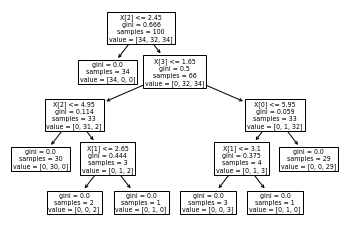

In [16]:
iris_classifier = DecisionTreeClassifier()
#creating the decision tree using the training data
iris_classifier_tree =  iris_classifier.fit(iris_train_attributes, iris_train_label)
#making the prediction
iris_classifier_prediction = iris_classifier_tree.predict(iris_test_attributes)

plot_tree(iris_classifier)
#finding the accuracy of the prediction
iris_classifier_accuracy = accuracy_score(iris_test_label, iris_classifier_prediction)
print("The accuracy is ",iris_classifier_accuracy*100 , "% for the iris decision tree")

The accuracy for the iris decision tree varies between 96 and 94 percent. When the tree is created one of the nodes (on the right hand side of the diagram) can be X[0] or X[2] this is because for both X[0] and X[2] the entropy is the same so its a random choice. This is why we get varied results.

## Question 3
Compare the accuracies of each experiment above when you change the criterion from 'gini' to 'entropy'.

75.0 % accurate for entropy    75.0 % accurate for gini


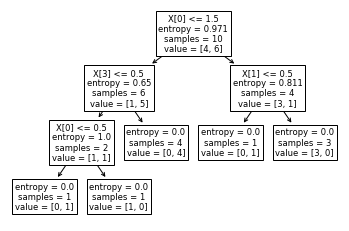

In [17]:
classifier_entropy = DecisionTreeClassifier("entropy")
#recreating the tree with entropy
classifier_tree_entropy =  classifier_entropy.fit(tennis_train_attributes, tennis_train_label)
plot_tree(classifier_tree_entropy)
#prediction with entropy
tennis_classifier_prediction_entropy = classifier_tree_entropy.predict(tennis_test_attributes)


classifier = DecisionTreeClassifier()
#the decision tree is built using the training attributes and labels
classifier_tree =  classifier.fit(tennis_train_attributes, tennis_train_label)
#the prediction uses the tree made from the training data to get labels for the test attributes
tennis_classifier_prediction = classifier_tree.predict(tennis_test_attributes)

print(100* accuracy_score(tennis_test_label, classifier_tree_entropy.predict(tennis_test_attributes)), 
      "% accurate for entropy   ",
      100* accuracy_score(tennis_test_label, tennis_classifier_prediction),  "% accurate for gini"
     )

The trees produced are similar and so are the results. There doesnt seem to be any difference.

96.0 % accurate for entropy    94.0 % accurate for gini


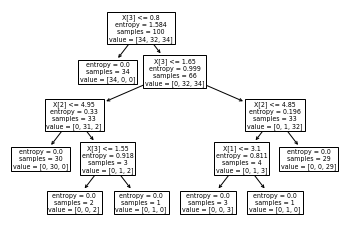

In [18]:
#setting the classifier to use entropy not gini the default.
iris_classifier_entropy = DecisionTreeClassifier("entropy")
#creating the tree
iris_classifier_tree_entropy =  iris_classifier_entropy.fit(iris_train_attributes, iris_train_label)
#making the prediction
iris_classifier_prediction_entropy = iris_classifier_tree_entropy.predict(iris_test_attributes)
#finding the accuracy
iris_classifier_accuracy_entropy = accuracy_score(iris_test_label, iris_classifier_prediction_entropy)

plot_tree(iris_classifier_entropy)

iris_classifier = DecisionTreeClassifier()
#creating the tree for gini which is the default
iris_classifier_tree =  iris_classifier.fit(iris_train_attributes, iris_train_label)
#creating the gini prediction
iris_classifier_prediction = iris_classifier_tree.predict(iris_test_attributes)
#finding the accuracy
iris_classifier_accuracy = accuracy_score(iris_test_label, iris_classifier_prediction)


print(100* accuracy_score(iris_test_label, iris_classifier_tree_entropy.predict(iris_test_attributes)), 
      "% accurate for entropy   ",
      100* accuracy_score(iris_test_label, iris_classifier_prediction),  "% accurate for gini"
     )


This is the tree for entropy, the two trees (gini and entropy) still vary between 96 and 94 percent, and so there doesnt seem to be any difference in the results.

## Question 4
From the Iris dataset, you will generate noisy versions of the original dataset by randomly changing from the correct class label to wrong ones from 0%-30% of the training instances (in increments of 2%)** and plot the output of the accuracies obtained from the (uncorrupted) test data for each noise level. The x-axis should be the noisy level(0-30%) and the y-axis the accuracy.

[]

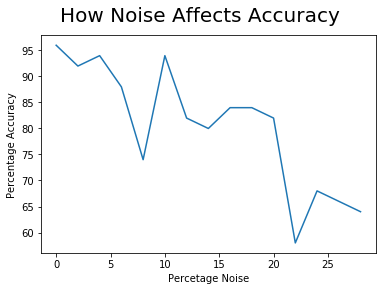

In [19]:
import random
import matplotlib.pyplot as plt
def noisy_percentage(percentage):
    """
    This function creates a set of iris label data that has noise based on the percentage given.
    
    Params:
    percentage: an integer between 1 and 100 that represents the percentage of the data that is to change to a wrong result
    
    Returns: iris data set with noise of a percentage to be specified
    """
    # the number of labels that need to change based on the percentage
    total_to_change = (len(iris_train_label))*(percentage/100)
    noisy_results = iris_train_label.copy()
    #a list random indexes of the data that will change to the wrong result.
    label_to_change = random.sample( range(len(iris_train_label)), int(total_to_change))
    for label in label_to_change:
        # each label is either 0 1 or 2 and is changed to a wrong label at random
        if iris_train_label.iris[label] == 0 :
            noisy_results.iris[label] = random.choice([1, 2 ])
                
        elif iris_train_label.iris[label] == 1 : 
            noisy_results.iris[label] = random.choice([0, 2 ])
                
        else:
            noisy_results.iris[label] = random.choice([0, 1 ])
    
    return noisy_results

def accuracy_percentage(percentage, iris_classifier):
    """
    This works out a value between 0 and 1 based on how accurate the predicted results are compared to the actual results. 
    The prediction is a set of results for the test data based on the decision tree made by the training data.
    
    Params:
    percentage: the percentage noise for the noisy results
    iris_classifier: the type of classifier. This allows me to change the min_samples_leaf in question 5
    
    Returns: float value between 0 and 1 of the accuracy of the data
    """
    noisy_label = noisy_percentage(percentage) 
    #creates the tree
    iris_classifier_tree =  iris_classifier.fit(iris_train_attributes, noisy_label)
    #creates the prediction
    iris_classifier_prediction = iris_classifier_tree.predict(iris_test_attributes)
    #finds the accuracy
    iris_classifier_accuracy = accuracy_score(iris_test_label, iris_classifier_prediction)
    return iris_classifier_accuracy

# its only range 15 because the percentage goes up in 2s to 30 so there are 30 results
plt.plot([(2*i) for i in range(15)],[100* accuracy_percentage((2*i), DecisionTreeClassifier()) for i in range(15)])
plt.xlabel('Percetage Noise')
plt.ylabel('Percentage Accuracy')
plt.suptitle('How Noise Affects Accuracy ', fontsize=20)
plt.plot()

The result above is for one set of results. Below will take a few seconds to run but it averages 100 results and you can see the trend much more clearly

[]

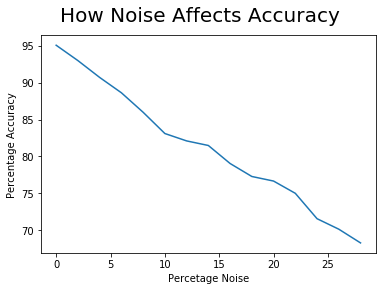

In [20]:
result_list = []
#run the results 100 times
for j in range(100):
    result_list.append([100* accuracy_percentage((2*i), DecisionTreeClassifier()) for i in range(15)])
#mean of the 100 results 
mean_list = np.mean(result_list, axis=0)
plt.plot([(2*i) for i in range(15)],mean_list)
plt.xlabel('Percetage Noise')
plt.ylabel('Percentage Accuracy')
plt.suptitle('How Noise Affects Accuracy ', fontsize=20)
plt.plot()

The percentage noise increases the accuruacy decreases, however it is very robust to the noise as seen in my findings, the majority of the test results are accurate (over 50%) between 60% to 70% accurate when noise reaches 30%

## Question 5
How does increasing the paramenter min_samples_leaf (e.g., from 1 to 2,3...) affect the accuracy on the test set from the noisy iris experiment? You should generate plots with multiple lines, each of them corresponding to one value of min_samples_leaf.

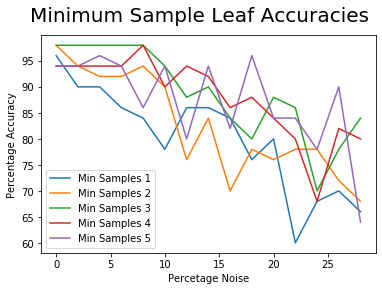

In [21]:
def graph_min_samples_leaf(number_of_samples):
    """
    This function creates a graph of 1 to X sets of percentage accuracy over percentage noise for 1 to X min_samples_leaf, 
    where X is the number of samples specified
    
    Params:
    number_of_samples: the number of lines on the graph representing 1 to the value stated of min_samples_leaf
    
    Returns: nothing returned, a graph is plotted.
    """
    labels = []
    for j in range(number_of_samples):
        #the samples must start at 1
        minsamples = j + 1
        labels.append("Min Samples " + str(j+1))
        #plot the accuracies with the min_leaf_samples changing each time
        plt.plot([(2*i) for i in range(15)], 
                 [100* accuracy_percentage((2*i), DecisionTreeClassifier(min_samples_leaf=minsamples)) for i in range(15)])
        
    plt.legend(labels)
    plt.suptitle('Minimum Sample Leaf Accuracies ', fontsize=20)
    plt.xlabel('Percetage Noise')
    plt.ylabel('Percentage Accuracy')
    plt.plot()
graph_min_samples_leaf(5)

likewise from before this graph is for 1 set of results, below is for 50 it will take a minute to run but you can see the difference

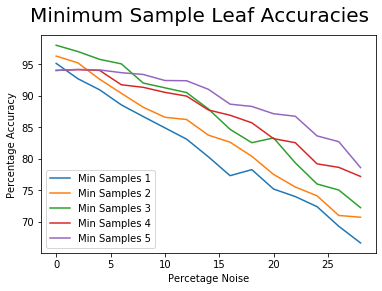

In [22]:
def graph_min_samples_leaf_repeats(number_of_samples):
    """
    This function creates a graph of 1 to X sets of percentage accuracy over percentage noise for 1 to X min_samples_leaf, 
    where X is the number of samples specified
    
    Params:
    number_of_samples: the number of lines on the graph representing 1 to the value stated of min_samples_leaf
    
    Returns: nothing returned, a graph is plotted.
    """
    labels = []
    for j in range(number_of_samples):
        minsamples = j + 1
        labels.append("Min Samples " + str(j+1))
        result_list = []
        #runing the results 50 times
        for k in range(50):
            result_list.append([100* accuracy_percentage((2*i), DecisionTreeClassifier(min_samples_leaf=minsamples)) for i in range(15)])
        #average of the 50 results
        mean_list = np.mean(result_list, axis=0)
        plt.plot([(2*i) for i in range(15)], mean_list)

    
    
    
    
    plt.legend(labels)
    plt.suptitle('Minimum Sample Leaf Accuracies ', fontsize=20)
    plt.xlabel('Percetage Noise')
    plt.ylabel('Percentage Accuracy')
    plt.plot()
graph_min_samples_leaf_repeats(5)

As the samples increase, the tree becomes more robust to noise. This makes sense because the minimum required samples for a leaf can prevent the anomolous noise data becoming a leaf.